<a href="https://colab.research.google.com/github/KawshikBarua/Logistic-Regression-and-Decision-Tree/blob/main/Logistic_regression_and_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sympy as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing  import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

In [ ]:
mushroom = pd.read_csv('/content/drive/MyDrive/mushroom edibility classification dataset.csv')
mushroom.head()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,poisonous,5.0,2,4.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,1,edible,5.0,2,9.0,bruises is there,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,2,edible,0.0,2,8.0,bruises is there,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,3,poisonous,5.0,3,8.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
4,4,edible,5.0,2,3.0,no bruises,5,1,3,2,2,7,7,0,2,1,0,3,0,1


In [ ]:
mushroom.drop(['Unnamed: 0'],axis=1,inplace=True)
mushroom.isnull().sum()

class                       0
cap-shape                   8
cap-surface                 0
cap-color                   8
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
#Removing Null Values
impute = SimpleImputer(np.nan,'mean')
impute.fit(mushroom[['cap-color']])
impute.fit(mushroom[['cap-shape']])
mushroom['cap-shape']=impute.fit_transform(mushroom[['cap-shape']])
mushroom['cap-color']=impute.fit_transform(mushroom[['cap-color']])

In [ ]:
#Performing necessary encodings
encoder=LabelEncoder()
mushroom['bruises-enc']=encoder.fit_transform(mushroom['bruises'])
mushroom.drop(['bruises'],axis=1,inplace=True)
mushroom.head()

,class,cap-shape,cap-surface,cap-color,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,bruises-enc
0,poisonous,5.0,2,4.0,6,0,3,2,2,7,7,0,2,1,4,2,3,5,0
1,edible,5.0,2,9.0,0,0,2,2,2,7,7,0,2,1,4,3,2,1,0
2,edible,0.0,2,8.0,3,0,2,2,2,7,7,0,2,1,4,3,2,3,0
3,poisonous,5.0,3,8.0,6,0,3,2,2,7,7,0,2,1,4,2,3,5,0
4,edible,5.0,2,3.0,5,1,3,2,2,7,7,0,2,1,0,3,0,1,1


In [ ]:
#Dropping the correlated columns by observing the heatmap done in the previous lab
mushroom.drop(['ring-type'],axis=1,inplace=True)
mushroom.drop(['stalk-shape'],axis=1,inplace=True)
mushroom.drop(['stalk-root'],axis=1,inplace=True)
mushroom.drop(['cap-color'],axis=1,inplace=True)
mushroom.drop(['population'],axis=1,inplace=True)

In [ ]:
#Performing Logistic Regression
logisticRegression= LogisticRegression()
x = mushroom.iloc[:,1:]
y = mushroom.iloc[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
logisticRegression.fit(x_train,y_train)
prediction_logistic=logisticRegression.predict(x_test)
accuracy_logistic = accuracy_score(y_test,prediction_logistic)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Performing Decision Tree
decisionTree=DecisionTreeClassifier("entropy",random_state=42)
decisionTree.fit(x_train,y_train)
prediction_dt=decisionTree.predict(x_test)
accuracy_dt=accuracy_score(y_test,prediction_dt)

In [ ]:
print("Accuracy using Logistic Regression: "+str(accuracy_logistic))
print("Accuracy using Decision Tree: "+str(accuracy_dt))

Accuracy using Logistic Regression: 0.9376
Accuracy using Decision Tree: 1.0


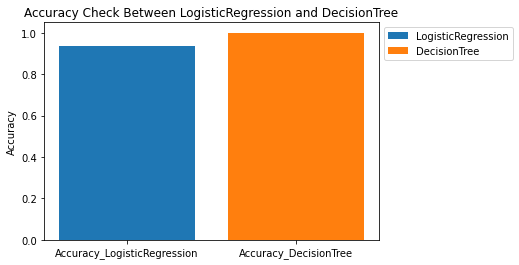

In [ ]:
accuracy_name=["Accuracy_LogisticRegression","Accuracy_DecisionTree"]
accuracy=[accuracy_logistic,accuracy_dt]
plt.title("Accuracy Check Between LogisticRegression and DecisionTree")
plt.ylabel("Accuracy")
plt.bar(accuracy_name[0],accuracy[0],label="LogisticRegression")
plt.bar(accuracy_name[1],accuracy[1],label="DecisionTree")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
print(prediction_dt)

['edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'poisonous' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'poisonous' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'poisonous' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'poisonous' 'edible' 'poisonous' 'edible' 'poisonous'
 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'poisonous' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'poisonous' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible

In [ ]:
y_train.head()

1746    edible
1967    edible
2757    edible
3120    edible
2488    edible
Name: class, dtype: object

In [ ]:
y_test.shape

(625,)

In [ ]:
x_train.head()

,cap-shape,cap-surface,odor,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,spore-print-color,habitat,bruises-enc
1746,5.0,0,5,2,2,7,7,0,2,1,3,1,1
1967,2.0,2,5,0,0,7,7,0,2,1,2,1,1
2757,5.0,3,5,2,2,7,6,0,2,1,3,0,0
3120,2.0,0,5,2,2,6,3,0,2,1,2,0,0
2488,2.0,0,5,2,2,3,6,0,2,1,3,0,0


In [ ]:
x_test.shape

(625, 13)